## Importing the necessary libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_validate

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


from sklearn.datasets import fetch_openml

In [3]:
import certifi
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

## Loading the data

In [4]:
mnist = fetch_openml('mnist_784', version = 1, cache = True, as_frame = False)
print(mnist.DESCR)

C:\Users\niksan2\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [8]:
#Indelning av datan i ett tränings- och testset 

#Första 60 000 dataexempel som träningsdata 
X_train = X[:60000]
y_train = y[:60000]

#Sista 10 000 exampel som testdata
X_test = X[10000:]
y_test = y[10000:]



In [9]:
X_train_2 = X_train[:10000]
y_train_2 = y_train[:10000]

## EDA

In [69]:
X_train.shape

(60000, 784)

In [70]:
X_train_reshaped = X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28))
X_train_reshaped.shape

(60000, 28, 28)

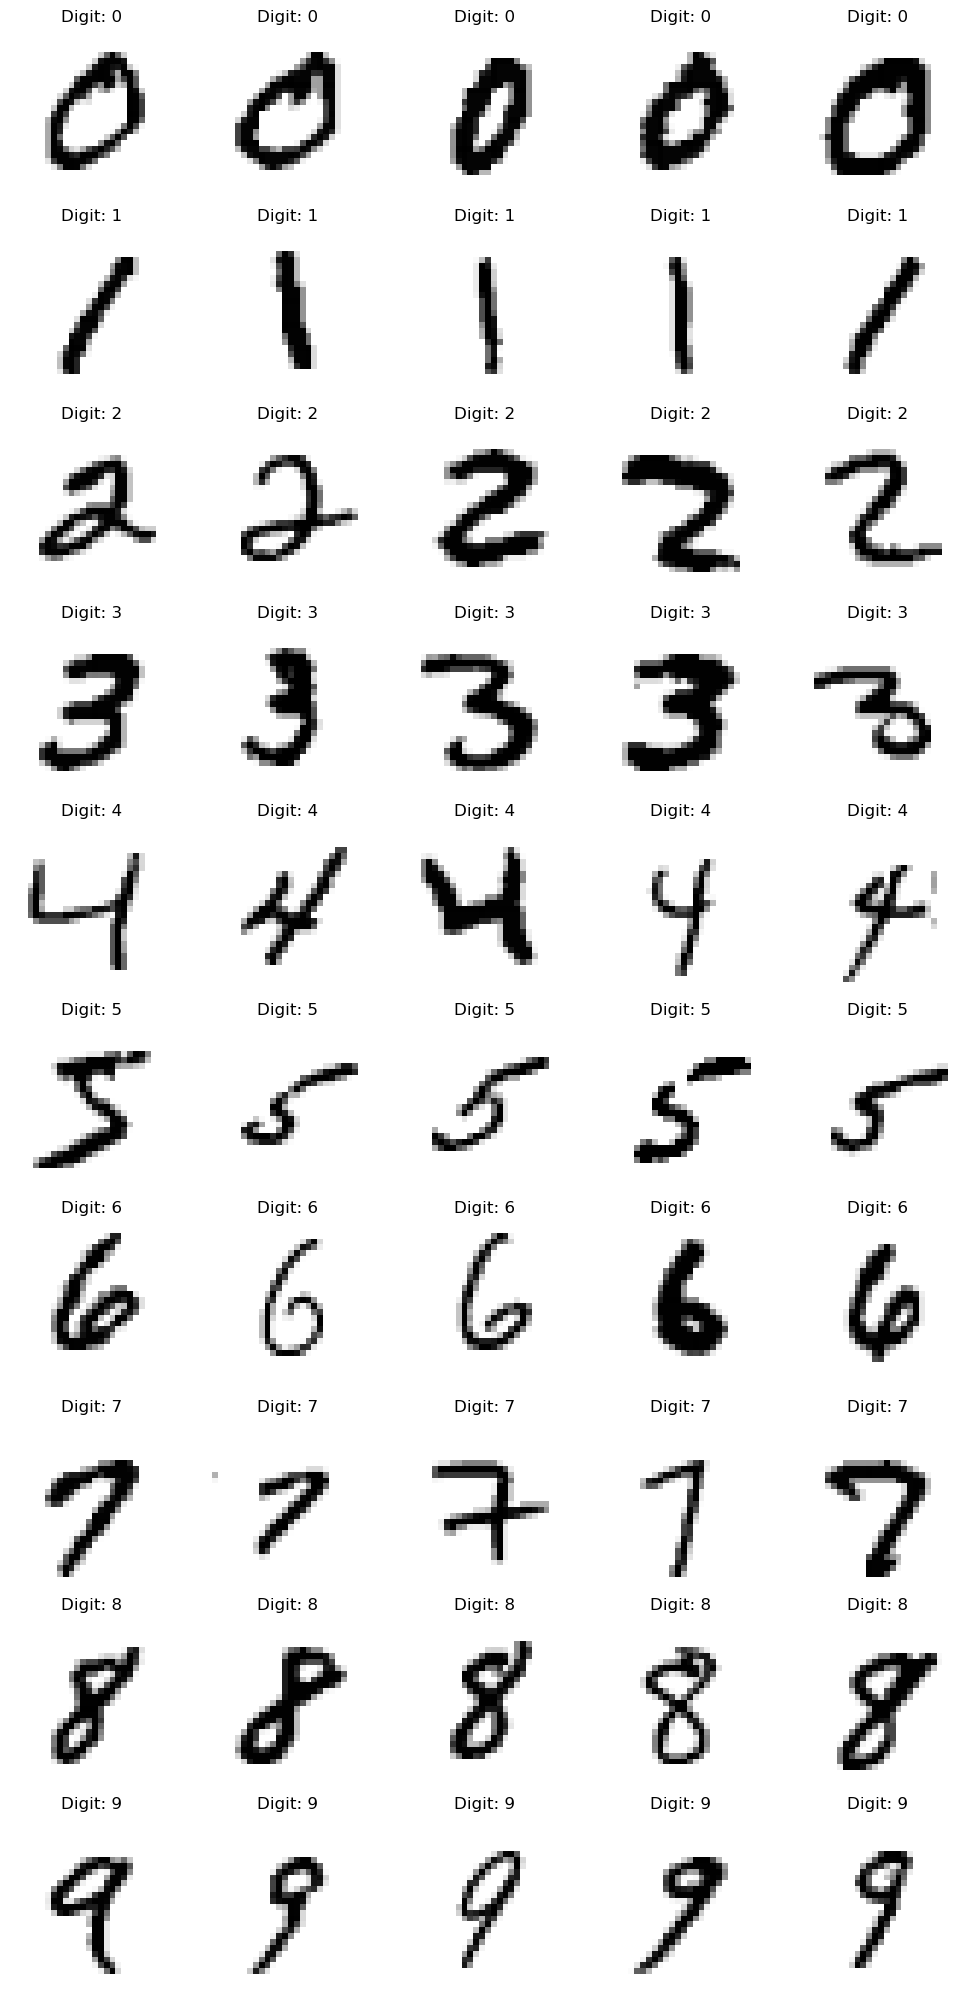

In [72]:

num_rows = 10  
num_cols = 5 
num_images = num_rows * num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))


grouped_examples = [[] for _ in range(10)]
for i, label in enumerate(y_train):
    grouped_examples[int(label)].append(X_train_reshaped[i])


for digit in range(10):
    for i in range(num_cols):
        axes[digit, i].imshow(grouped_examples[digit][i], cmap=mpl.cm.binary)
        axes[digit, i].set_title(f"Digit: {digit}")
        axes[digit, i].axis('off')


plt.tight_layout()
plt.show()

## Evaluating 3 different models

In [11]:
scaler = StandardScaler()
X_train_2_scaled = scaler.fit_transform(X_train_2)



In [32]:
KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': (4, 5, 6)}
                   
gs_KNN = GridSearchCV(KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

gs_KNN.fit(X_train_2_scaled, y_train_2)

print(gs_KNN.best_params_)

y_pred_knn = gs_KNN.predict(X_train_2_scaled)

print(accuracy_score(y_train_2, y_pred_knn))



{'n_neighbors': 5}
0.9435


In [64]:
logistic_clf = LogisticRegression(max_iter=1000)

hyper_param_grid_logistic = {'C': [0.5, 1, 1.5]}

gs_logistic = GridSearchCV(logistic_clf, hyper_param_grid_logistic, cv=3)
gs_logistic.fit(X_train_2_scaled, y_train_2)

print(gs_logistic.best_params_)

{'C': 0.5}


In [63]:
y_pred_gs_logistic = gs_logistic.predict(X_train_2_scaled)
accuracy_score(y_train_2, y_pred_gs_logistic)

0.9935

In [13]:
svm_clf = SVC()

hyper_param_grid = [
    {'kernel': ['rbf', 'poly'], 'gamma': [1, 2], 'C': [0.5, 1, 1.5]}
]

gs_svm = GridSearchCV(svm_clf, hyper_param_grid, cv = 3)
gs_svm.fit(X_train_2_scaled, y_train_2)

print(gs_svm.best_params_)

{'C': 0.5, 'gamma': 1, 'kernel': 'poly'}


In [17]:
y_pred_gs_svm = gs_svm.predict(X_train_2_scaled)
accuracy_score(y_train_2, y_pred_gs_svm)

1.0

## Training the model on the complete training set using the best hyperparameters

In [18]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svc', SVC(kernel='poly', gamma=1, C=0.5))  
])


pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.5, gamma=1, kernel='poly'))])

In [58]:
y_pred_svc = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_svc)

print("Accuracy on entire train set: ", train_accuracy)

Accuracy on entire train set:  1.0


## Evaluating the model on the test set

In [65]:
test_accuracy = pipeline.score(X_test, y_test)

print("Accuracy on test set:", test_accuracy)

Accuracy on test set: 0.9963833333333333


In [66]:
y_pred_svc_test = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_svc_test)

print("Accuracy on test set: ", test_accuracy)

Accuracy on test set:  0.9963833333333333


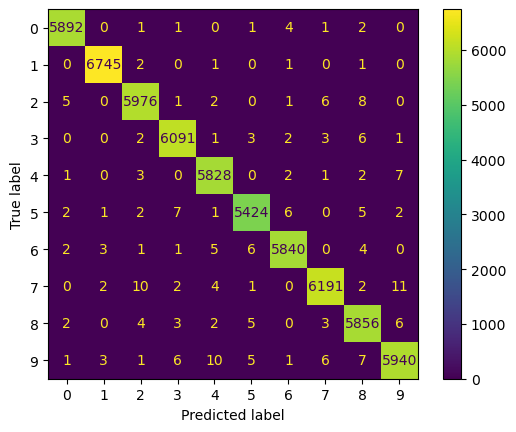

In [49]:
y_pred_test = pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm).plot()

In [47]:
y_pred_svc[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [48]:
y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)